In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore')

# Problem statement :
### Findout the risk factors for losing money while lending to customers

In [2]:
data = pd.read_csv('Desktop/tableau works/ctm/upgrad/LendingClubCaseStydy/loan.csv')

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# # Data Cleaning

--we need to identify the columns with Null values, and need to remove them.

In [4]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
data.shape

(39717, 111)

we can say that some columns having complete Null values. we need to drop those columns. those are unnecessary

In [6]:
data.dropna(axis = 1, how = 'all', inplace=True)

In [7]:
data.shape

(39717, 57)

111 columns are now reduced to 53 columns

In [8]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [9]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

"desc", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d" columns having more number of Null values, those not helpfull for our analysis, so need to remove them.

In [10]:
columns_drop1= ["desc", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d",]

In [11]:
data.drop(labels= columns_drop1, axis=1, inplace=True)

there are some customer behaviour columns those are the variables not available at the time of loan application, and thus they cannot be used as predictors for credit approval. we do not need to consider them

In [12]:
columns_drop2= ["delinq_2yrs", "earliest_cr_line",  "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "application_type" ]

In [13]:
data.drop(labels=columns_drop2, axis=1, inplace=True)

In [14]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,inq_last_6mths,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,27.65,1,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.00,5,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,8.72,2,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,20.00,1,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,17.94,0,f,0.0,1,0,0.0,0,0.0,0.0


There are some mpre columns are not needed for analysis, need to drop them also

In [15]:
columns_drop3=["id", "member_id", "emp_title", "url", "title", "zip_code", "addr_state"]

In [16]:
data.drop(labels=columns_drop3, axis=1, inplace=True)

In [17]:
data.shape

(39717, 26)

# we need to find the categorical variables, continuous variables

In [18]:
data.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
dti                            2868
inq_last_6mths                    9
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

In [19]:
cnt_columns= ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti"]
cat_columns= ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "loan_status", "pymnt_plan", "purpose", "pub_rec_bankruptcies"]

In [20]:
print(cnt_columns)
print(cat_columns)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'pub_rec_bankruptcies']


### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans. 
- To exclude that data , removing the records with current loan status

In [21]:
data=data[data.loan_status!='Current']
data.loan_status.nunique()

2

In [22]:
data.shape

(38577, 26)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  object 
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_length                  37544 non-null  object 
 9   home_ownership              38577 non-null  object 
 10  annual_inc                  38577 non-null  float64
 11  verification_status         38577 non-null  object 
 12  issue_d                     38577 non-null  object 
 13  loan_status                 385

# Standardising the data

In [24]:
data['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

we need to remove the '%' symbol from 'int_rate' column and need to convert that column into float

# Data Manipulation

In [25]:
data['int_rate']=pd.to_numeric( data['int_rate'].str.rstrip('%') )

In [26]:
data['int_rate'].describe

<bound method NDFrame.describe of 0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64>

In [27]:
data['emp_length'].head(5)

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
5      3 years
Name: emp_length, dtype: object

# Removing the outliers

In [28]:
data.nunique()

loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
purpose                          14
dti                            2853
inq_last_6mths                    9
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

In [29]:
cnt_columns= ["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti"]
cat_columns= ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "loan_status", "pymnt_plan", "purpose", "pub_rec_bankruptcies"]

<AxesSubplot:xlabel='loan_amnt'>

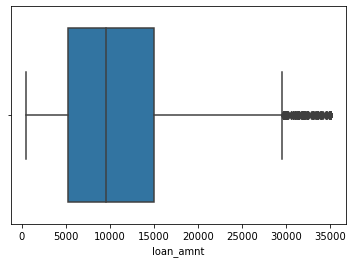

In [30]:
sns.boxplot(data['loan_amnt'])

In [31]:
data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [32]:
quantile_info = data.loan_amnt.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     9600.0
0.75    15000.0
0.90    21600.0
0.95    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [33]:
per_95_loan_amnt = data['loan_amnt'].quantile(0.95)
data = data[data.loan_amnt <= per_95_loan_amnt]

<AxesSubplot:xlabel='loan_amnt'>

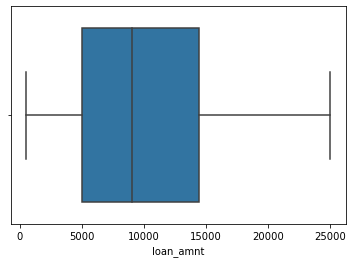

In [34]:
sns.boxplot(data['loan_amnt'])

<AxesSubplot:xlabel='funded_amnt'>

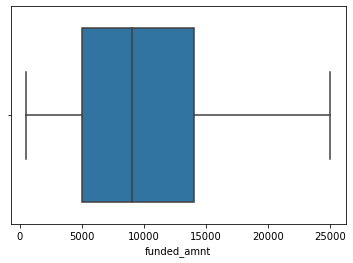

In [35]:
sns.boxplot(data['funded_amnt'])

<AxesSubplot:xlabel='funded_amnt_inv'>

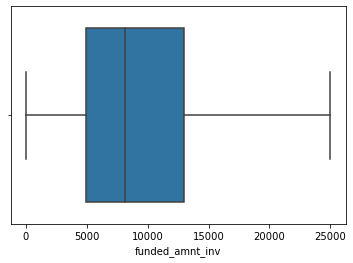

In [36]:
sns.boxplot(data['funded_amnt_inv'])

<AxesSubplot:xlabel='int_rate'>

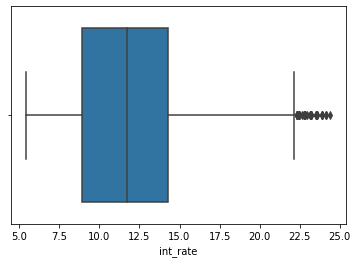

In [37]:
sns.boxplot(data['int_rate'])

In [38]:
data['int_rate'].describe()

count    37142.000000
mean        11.792128
std          3.601086
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         24.400000
Name: int_rate, dtype: float64

In [39]:
quantile_info = data.int_rate.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    11.71
0.75    14.26
0.90    16.49
0.95    17.99
0.97    18.79
0.98    19.42
0.99    20.62
Name: int_rate, dtype: float64

In [40]:
per_99_int_rate = data['int_rate'].quantile(0.99)
data = data[data.int_rate <= per_99_int_rate]

<AxesSubplot:xlabel='int_rate'>

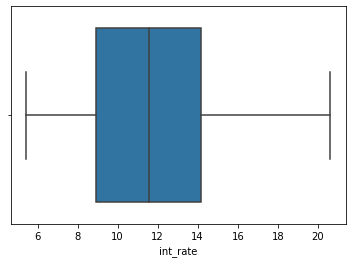

In [41]:
sns.boxplot(data['int_rate'])

<AxesSubplot:xlabel='dti'>

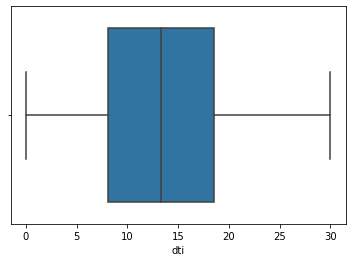

In [42]:
sns.boxplot(data['dti'])

<AxesSubplot:xlabel='annual_inc'>

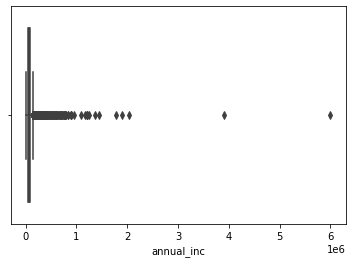

In [43]:
sns.boxplot(data['annual_inc'])

In [44]:
quantile_info = data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     57000.00
0.75     80000.00
0.90    110000.00
0.95    135000.00
0.97    156000.00
0.98    178560.24
0.99    214248.00
Name: annual_inc, dtype: float64

In [45]:
per_95_annual_inc = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

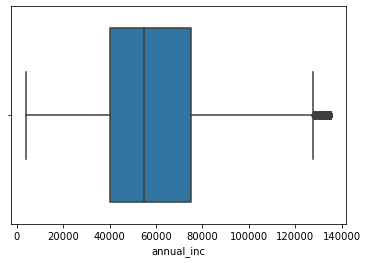

In [46]:
sns.boxplot(data['annual_inc'])

In [47]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,34975.000000,34975.000000,34975.000000,34975.000000,34975.000000,34975.000000,34975.000000,34975.000000,34930.0,34975.0,34975.0,34930.0,34975.0,34319.000000,34945.0
mean,9943.981415,9738.709793,9210.152681,11.681276,294.019110,59308.187947,13.411016,0.861301,0.0,1.0,0.0,0.0,0.0,0.045252,0.0
std,6027.973427,5834.893632,5774.085098,3.482637,177.169737,26631.932133,6.667068,1.061420,0.0,0.0,0.0,0.0,0.0,0.208559,0.0
min,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5000.000000,5000.000000,4900.000000,8.900000,160.400000,39996.000000,8.310000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,9000.000000,8500.000000,8000.000000,11.580000,260.850000,55000.000000,13.520000,1.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,14000.000000,13200.000000,12475.000000,14.120000,390.595000,75000.000000,18.680000,1.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,25000.000000,25000.000000,25000.000000,20.620000,931.130000,135000.000000,29.990000,8.000000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


# univariate analysis on categorical variables

In [48]:
cat_columns

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'pub_rec_bankruptcies']

<AxesSubplot:xlabel='loan_status', ylabel='count'>

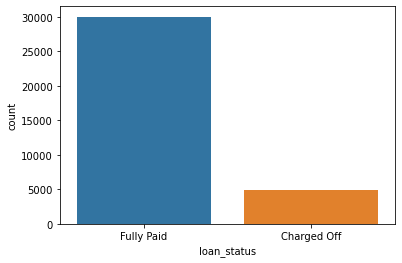

In [49]:
sns.countplot(x = 'loan_status', data = data)

<AxesSubplot:xlabel='grade', ylabel='count'>

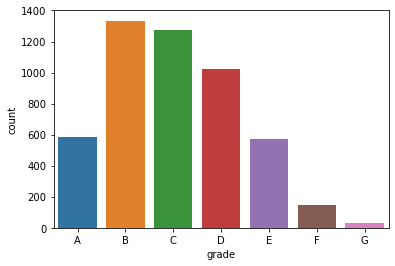

In [51]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , data = data[data.loan_status == 'Charged Off'])

obeservation : B and C grade are having more chances for Default/Charged off

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

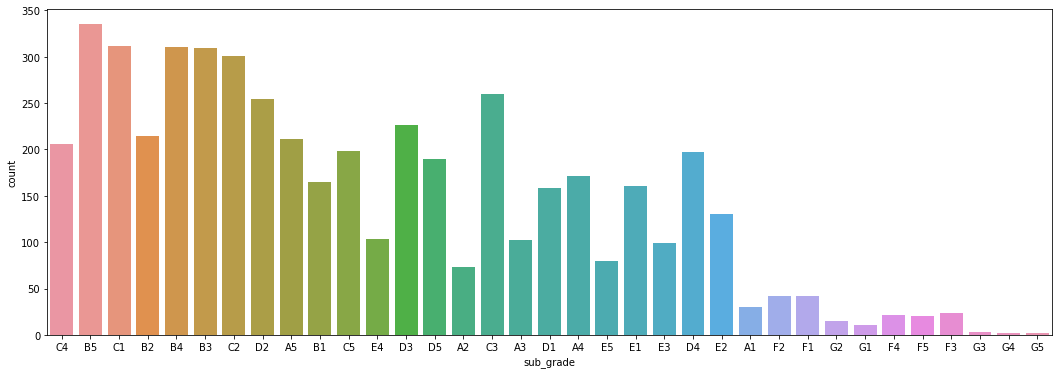

In [52]:
fig, ax = plt.subplots(figsize = (18,6))
sns.countplot(x = 'sub_grade', data = data[data.loan_status == 'Charged Off'])

obeservation : 
- in grade B, sub_grade B5 has more chances for Default/Charged off,
- in grade c, sub_grade C1 has more chances for Default/Charged off

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

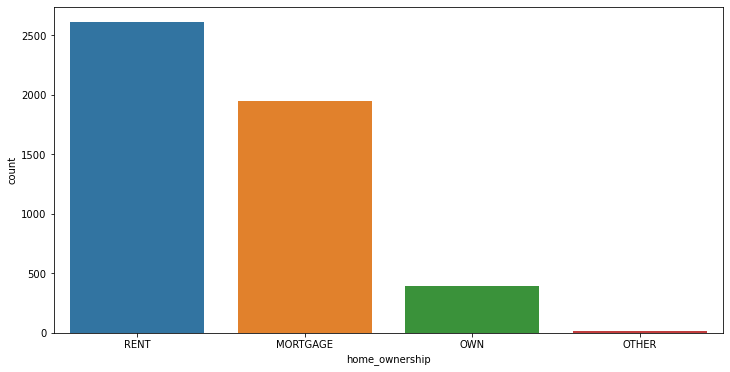

In [53]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x = 'home_ownership', data = data[data.loan_status == 'Charged Off'])

obeservation : 
- Applicants with Rent type home_ownership has more chances for Default/Charged off


<AxesSubplot:xlabel='count', ylabel='emp_length'>

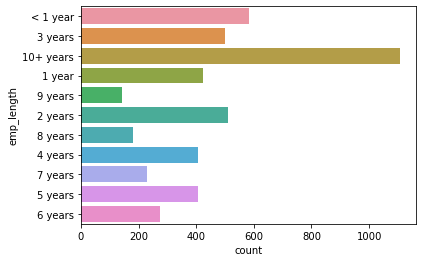

In [55]:
sns.countplot(y ='emp_length', data=data[data.loan_status == 'Charged Off'])

obeservation : 
- emp_length with 10+ years has more chances for Default/Charged off

<AxesSubplot:xlabel='count', ylabel='purpose'>

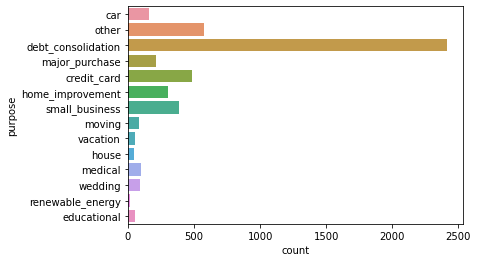

In [57]:

sns.countplot(y ='purpose', data=data[data.loan_status == 'Charged Off'])


obeservation : 
- Loan applicants with debt_consolidation purpose has more chances for Default/Charged off

<AxesSubplot:xlabel='count', ylabel='term'>

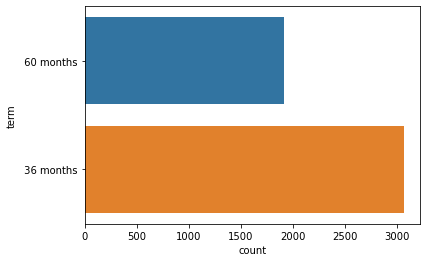

In [58]:
sns.countplot(y ='term', data=data[data.loan_status == 'Charged Off'])

obeservation : 
- Loan applicants with 36 months term has more chances for Default/Charged off

<AxesSubplot:xlabel='verification_status', ylabel='count'>

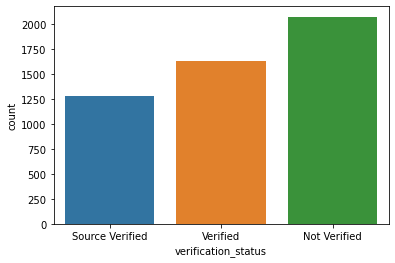

In [59]:
sns.countplot(x ='verification_status', data=data[data.loan_status == 'Charged Off'])

# univariate analysis on continuous variables

In [61]:
bins = [0, 10, 20, 30]
data['int_rate_bins'] = pd.cut(data['int_rate'], bins, labels= ['0%-10%', '10%-20%','20%-30%'])

<AxesSubplot:xlabel='int_rate_bins', ylabel='count'>

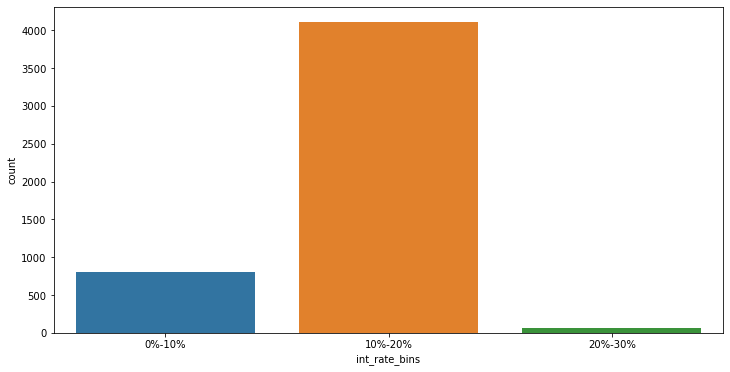

In [62]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x ='int_rate_bins', data=data[data.loan_status == 'Charged Off'])

obeservation : 
- Loan applicants with 10%-20% intrest rate has more chances for Default/Charged off

In [65]:
bins=[20000,40000,60000,80000,100000,120000]
data['annual_inc_bins'] = pd.cut(data['annual_inc'], bins, labels= ['<40k', '40k-60k', '60k-80k', '80k-100k', '100k-120K'])


<AxesSubplot:xlabel='annual_inc_bins', ylabel='count'>

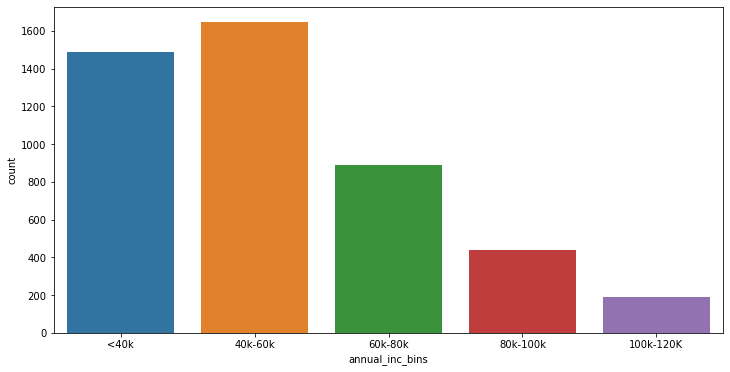

In [66]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x ='annual_inc_bins', data=data[data.loan_status == 'Charged Off'])

obeservation : 
- Loan applicants with <80K annual income has more chances for Default/Charged off
-  Loan applicants with >80K annual income has less chances for Default/Charged off

In [67]:
data['installment_bins'] = pd.cut(data['installment'], bins=10,precision =0, labels=['15-109','109-203','203-296','296-389','389-483','483-576','576-670','670-763','763-857','857-950'])

<AxesSubplot:xlabel='installment_bins', ylabel='count'>

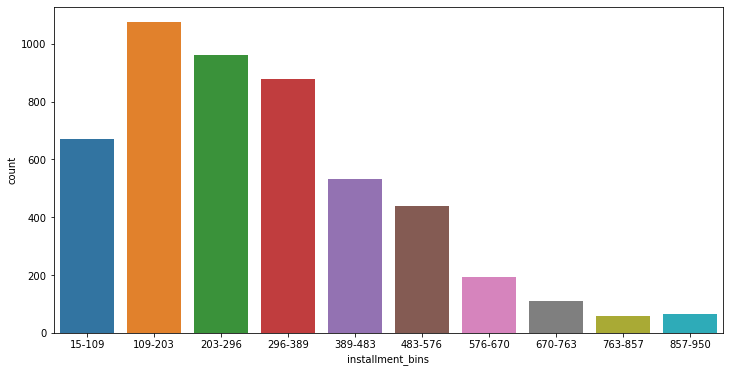

In [68]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(x ='installment_bins', data=data[data.loan_status == 'Charged Off'])

In [69]:
data['funded_amnt_inv_bins'] = pd.cut(data['funded_amnt_inv'], bins=10, precision=0, labels=['<2.2K','2.2k-4.4k','4.4k-6.6k','6.6k-8.8k','8.8k-11k','11k-13.2k','13.2k-15.4k','15.4k-17.6k', '17.6k-19.8k', '19.8k-22k'])

<AxesSubplot:xlabel='funded_amnt_inv_bins', ylabel='count'>

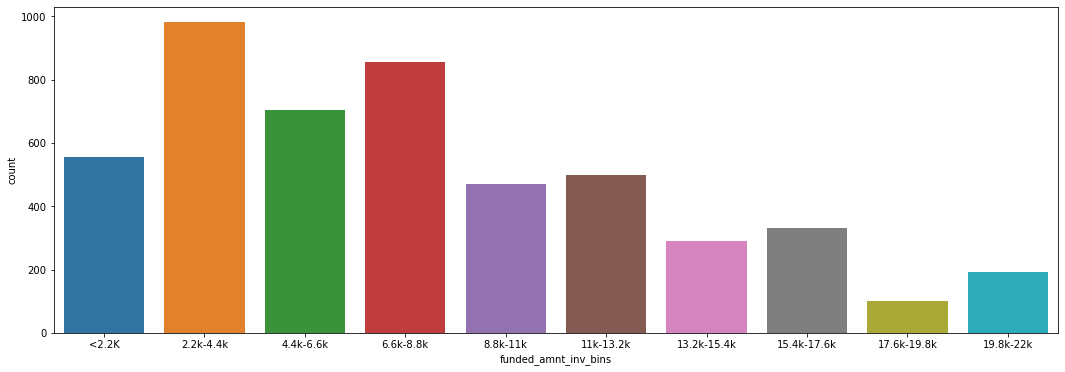

In [70]:
fig, ax = plt.subplots(figsize = (18,6))
sns.countplot(x ='funded_amnt_inv_bins', data=data[data.loan_status == 'Charged Off'])

In [71]:
data['loan_amnt_bins'] = pd.cut(data['loan_amnt'], bins=10,precision =0, labels=['<2.2K','2.2k-4.4k','4.4k-6.6k','6.6k-8.8k','8.8k-11k','11k-13.2k','13.2k-15.4k','15.4k-17.6k', '17.6k-19.8k', '19.8k-22k'])

<AxesSubplot:xlabel='loan_amnt_bins', ylabel='count'>

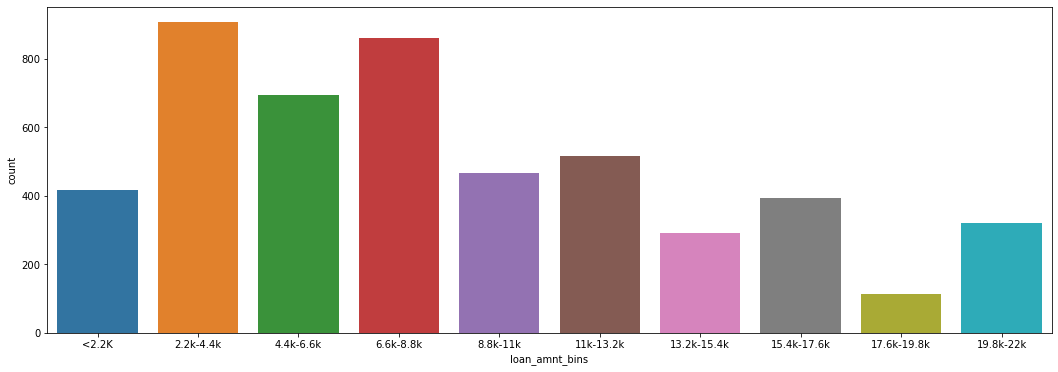

In [72]:
fig, ax = plt.subplots(figsize = (18,6))
sns.countplot(x ='loan_amnt_bins', data=data[data.loan_status == 'Charged Off'])

In [74]:
data['dti_bins'] = pd.cut(data['dti'], bins=5,precision =0, labels= ['0-6', '6-12', '12-18', '18-24', '24-30'])

<AxesSubplot:xlabel='dti_bins', ylabel='count'>

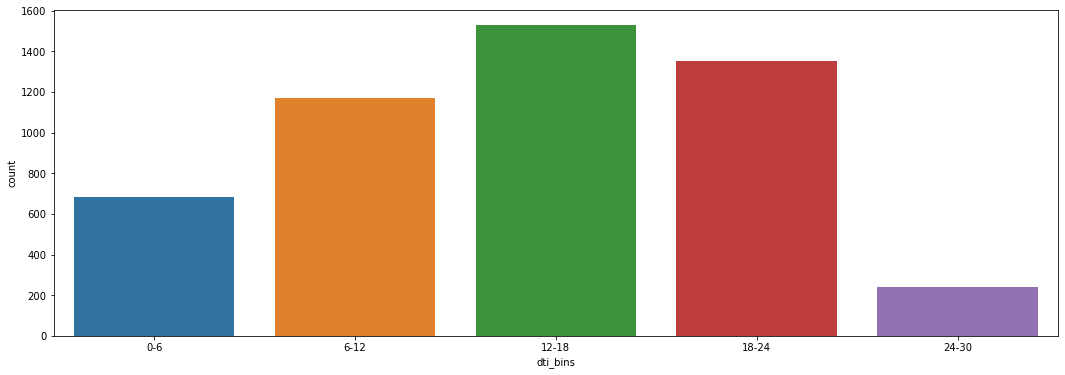

In [75]:
fig, ax = plt.subplots(figsize = (18,6))
sns.countplot(x ='dti_bins', data=data[data.loan_status == 'Charged Off'])

obeservation : 
- Loan applicants with 12-18 dti has more chances for Default/Charged off

In [76]:
cnt_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti']

In [77]:
cat_columns

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'pub_rec_bankruptcies']

# bivariate analysis

<AxesSubplot:xlabel='annual_inc', ylabel='purpose'>

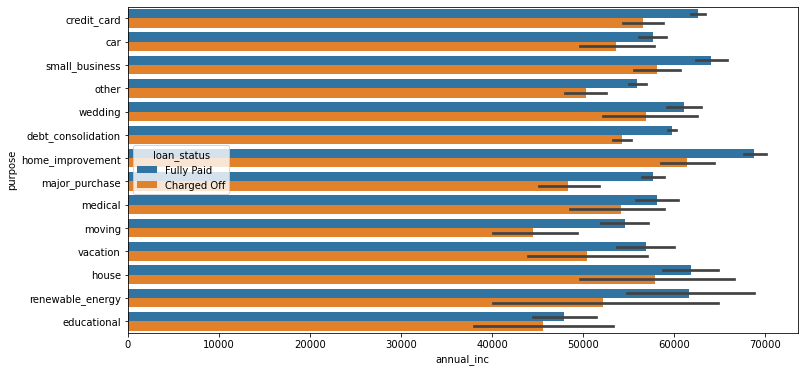

In [86]:
plt.figure(figsize=(12,6))
sns.barplot(x ='annual_inc', y='purpose', data=data, hue ='loan_status')

obeservation : 
- Loan applicants with <60K annual income and who are looking for home_improvement & small_business has more chances for Default/Charged off


<AxesSubplot:xlabel='annual_inc_bins', ylabel='loan_amnt'>

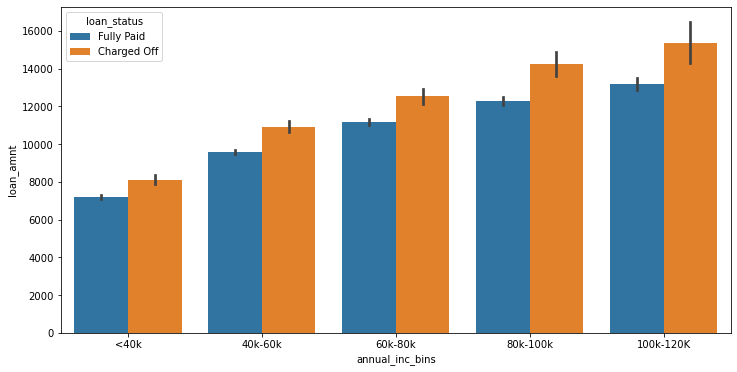

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x ='annual_inc_bins', y='loan_amnt', data=data, hue ='loan_status')

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

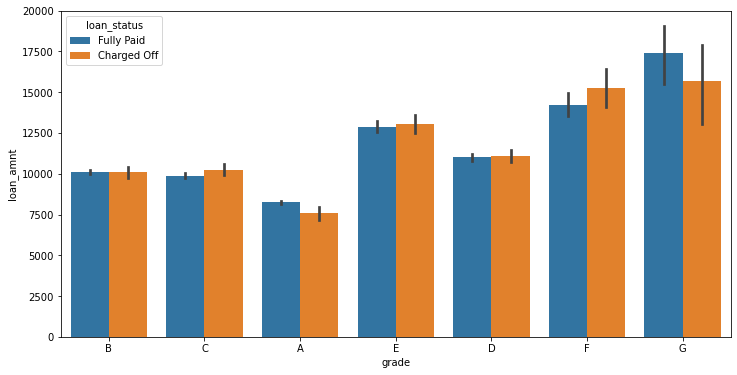

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(x ='grade', y='loan_amnt', data=data, hue ='loan_status')

<AxesSubplot:xlabel='annual_inc_bins', ylabel='int_rate'>

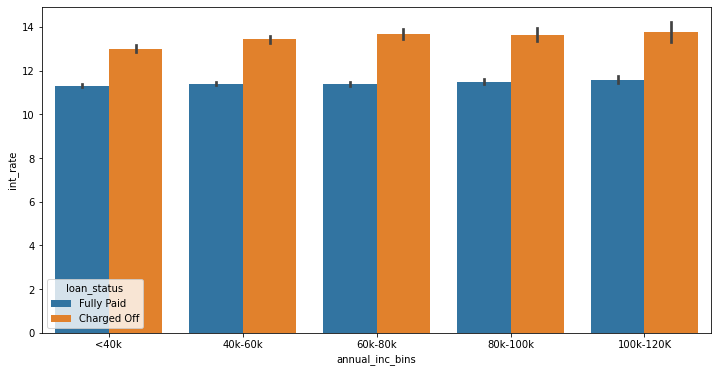

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x ='annual_inc_bins', y='int_rate', data=data, hue ='loan_status')

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

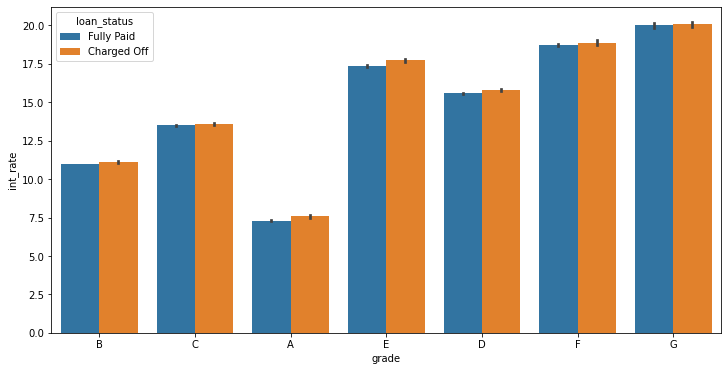

In [82]:
plt.figure(figsize=(12,6))
sns.barplot(x ='grade', y='int_rate', data=data, hue ='loan_status')

obeservation :
for grade G and intrest rate > 17.5% has more chances of Default/charged off

<AxesSubplot:xlabel='loan_amnt_bins', ylabel='int_rate'>

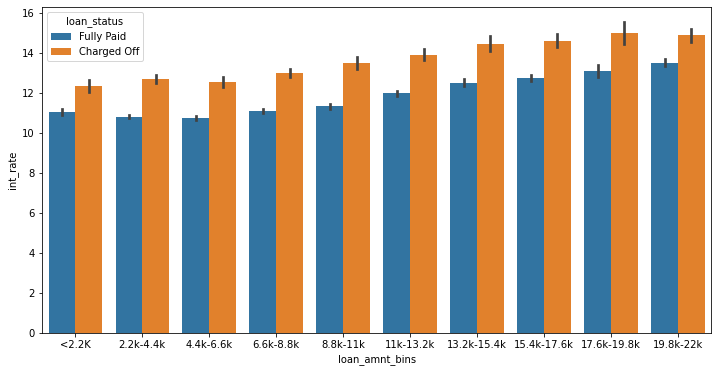

In [83]:
plt.figure(figsize=(12,6))
sns.barplot(x ='loan_amnt_bins', y='int_rate', data=data, hue ='loan_status')

Loan applicants with 19.8K to 22k loan amount and interest rate more than 14% has more chances for Default/Charged off

<AxesSubplot:xlabel='term', ylabel='int_rate'>

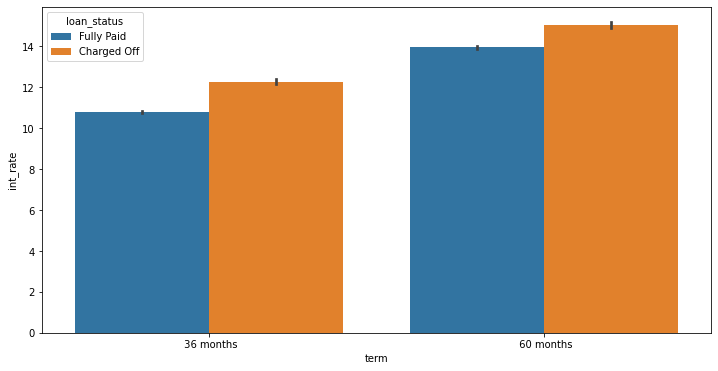

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(x ='term', y='int_rate', data=data, hue ='loan_status')

Loan applicants with 60 months term and >14% interest rate has more chances for Default/Charged off

# obeservations

1.  B and C grade are having more chances for Default/Charged off
2. - in grade B, sub_grade B5 has more chances for Default/Charged off,
   - in grade c, sub_grade C1 has more chances for Default/Charged off
3. Applicants with Rent type home_ownership has more chances for Default/Charged off
4. emp_length with 10+ years has more chances for Default/Charged off
5.  Loan applicants with debt_consolidation purpose has more chances for Default/Charged off
6. Loan applicants with 36 months term has more chances for Default/Charged off
7. Loan applicants with 10%-20% intrest rate has more chances for Default/Charged off
8. - Loan applicants with <80K annual income has more chances for Default/Charged off
   -  Loan applicants with >80K annual income has less chances for Default/Charged off
9. Loan applicants with <60K annual income and who are looking for home_improvement & small_business has more chances for Default/Charged off
10. for grade G and intrest rate > 17.5% has more chances of Default/charged off
11. Loan applicants with 19.8K to 22k loan amount and interest rate more than 14% has more chances for Default/Charged off
12. Loan applicants with 60 months term and >14% interest rate has more chances for Default/Charged off.